<a href="https://colab.research.google.com/github/ssharanyab/Rice-Classification/blob/main/rice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install catboost
!pip install catboost

In [ ]:
# install shap
!pip install shap

In [ ]:
# import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, RocCurveDisplay, plot_roc_curve, confusion_matrix

from catboost import CatBoostClassifier

In [ ]:
# import rice dataset

rice_df = pd.read_csv('Rice_Osmancik_Cammeo_Dataset.csv')

rice_df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
rice_df.shape

(3810, 8)

In [ ]:
# check for null values
rice_df.isnull().sum()

AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64

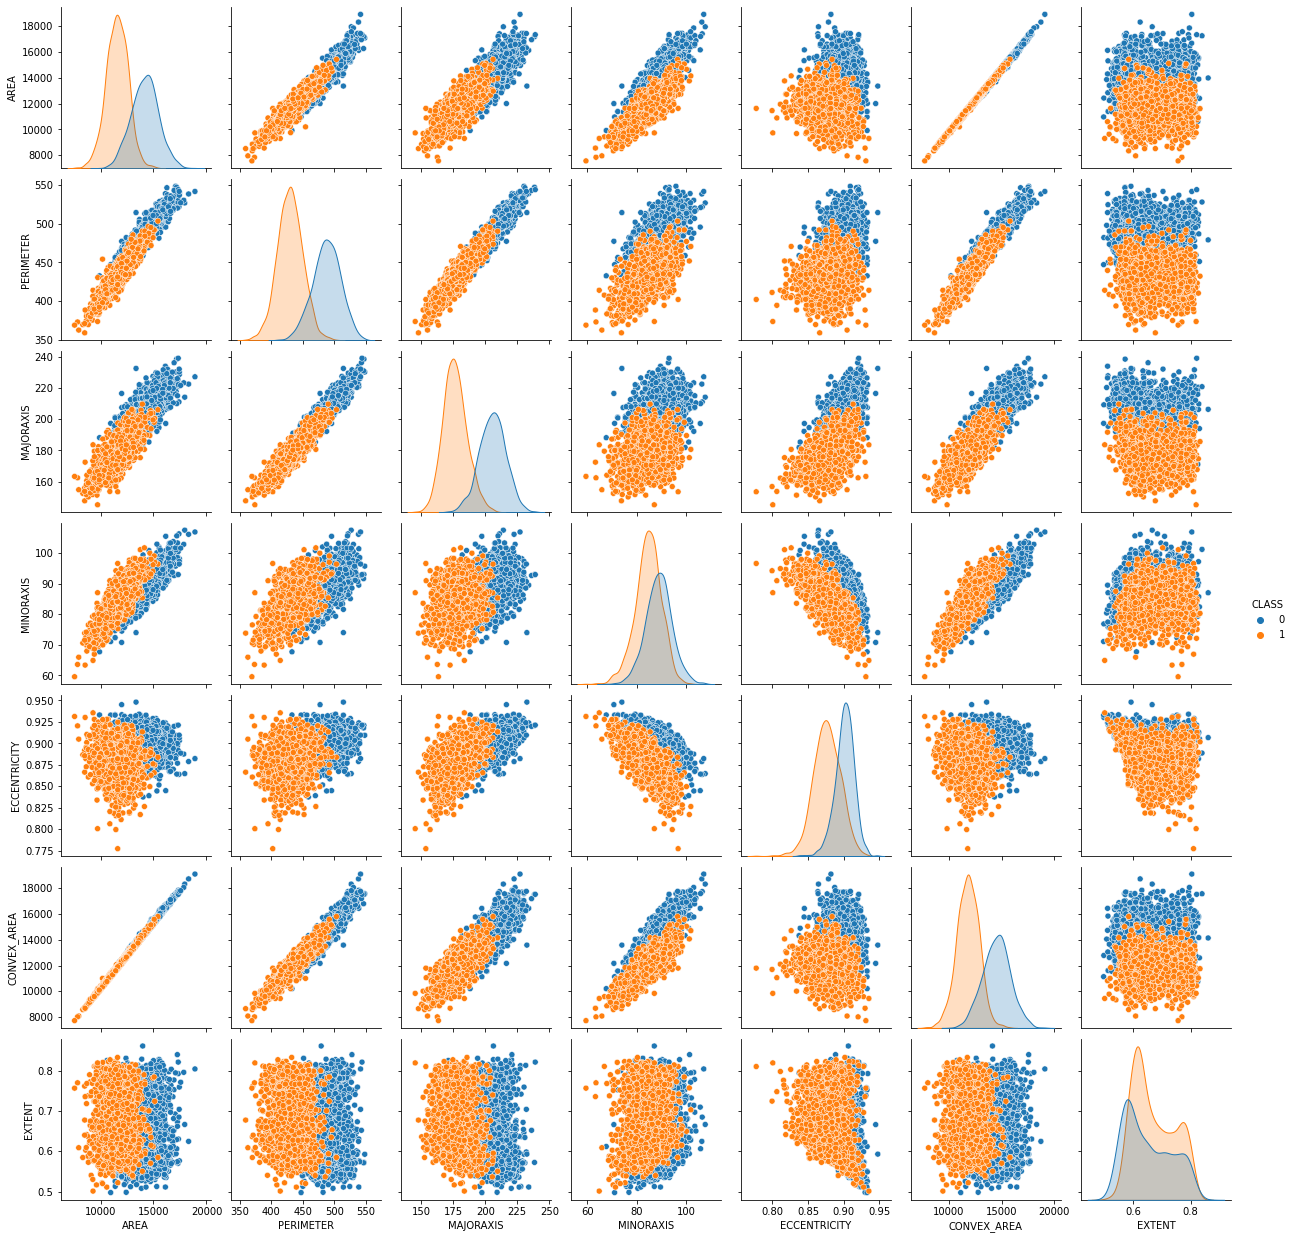

In [ ]:
# features distributions
sns.pairplot(rice_df, hue='CLASS')

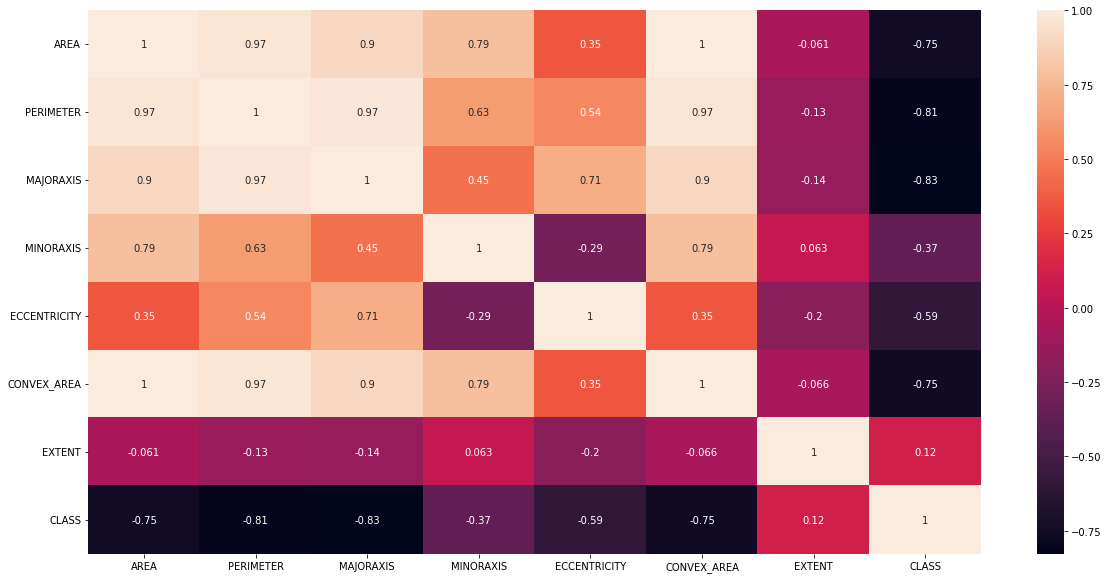

In [ ]:
rice_df['CLASS'].replace('Cammeo', 0,inplace=True)
rice_df['CLASS'].replace('Osmancik', 1,inplace=True)


plt.figure(figsize=(20, 10))
sns.heatmap(rice_df.corr(), annot=True)

In [ ]:
# drop CONVEX_AREA, PERIMETER as they are correlated with AREA
rice_df.drop(labels=['CONVEX_AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS'], axis=1, inplace=True)

rice_df.head()

,AREA,ECCENTRICITY,EXTENT,CLASS
0,15231,0.928882,0.572896,0
1,14656,0.895405,0.615436,0
2,14634,0.912118,0.693259,0
3,13176,0.891861,0.640669,0
4,14688,0.906691,0.646024,0


In [ ]:
rice_df.shape

(3810, 4)

In [ ]:
# prepare input and output data
y = rice_df['CLASS']
X = rice_df.drop('CLASS', axis=1)

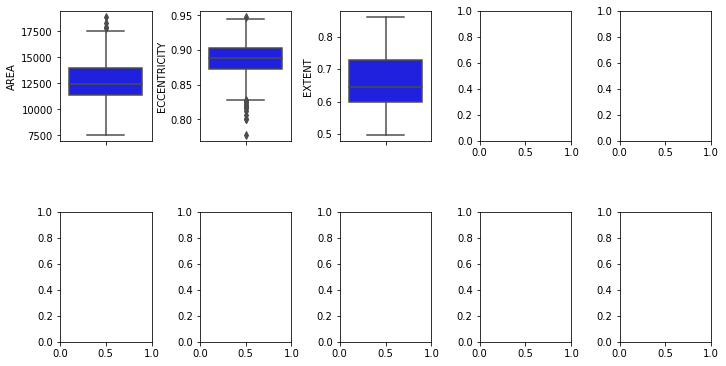

In [ ]:
# features distributions
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for key, value in X.items():
    sns.boxplot(y=key, data=X, ax=axs[index], color= 'blue')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Catboost params
params = {'iterations':600,
        'learning_rate':0.01,
        'depth':2,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':600, # most recent best iteration to wait before stopping
        'random_seed': 1,
        'bootstrap_type': 'Bayesian'
}

In [ ]:
# model building
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9361732	best: 0.9361732 (0)	total: 46.9ms	remaining: 28.1s
200:	test: 0.9787118	best: 0.9787118 (200)	total: 193ms	remaining: 384ms
400:	test: 0.9801414	best: 0.9801636 (381)	total: 332ms	remaining: 165ms
599:	test: 0.9804616	best: 0.9804616 (588)	total: 476ms	remaining: 0us

bestTest = 0.980461559
bestIteration = 588

Shrink model to first 589 iterations.


In [ ]:
# predict on the testing test
y_pred = cat_model.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# accuracy of the model
print("Test Accuracy CatBoostClassifier:", cat_model.score(X_test, y_test))

Test Accuracy CatBoostClassifier: 0.9433368310598111


In [ ]:
# print classification report
cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       430
           1       0.94      0.96      0.95       523

    accuracy                           0.94       953
   macro avg       0.94      0.94      0.94       953
weighted avg       0.94      0.94      0.94       953



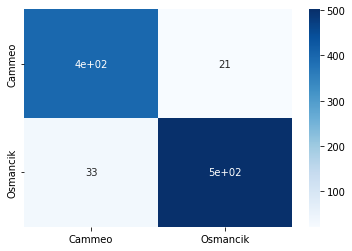

In [ ]:
# plot confusion matrix
cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=['Cammeo', 'Osmancik'], yticklabels=['Cammeo', 'Osmancik'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


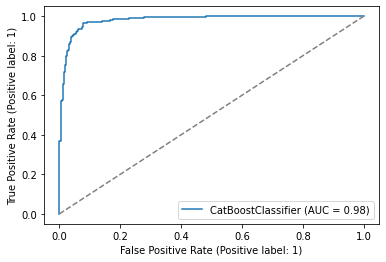

In [ ]:
# plot ROC curve
display = plot_roc_curve(cat_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.show()

Text(0.5, 1.0, 'Features importance for rice variety classification')

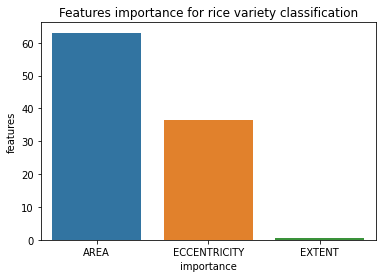

In [ ]:
# feature importance
sns.barplot(y=cat_model.feature_importances_, x=cat_model.feature_names_)
plt.xlabel('importance')
plt.ylabel('features')
plt.title('Features importance for rice variety classification')

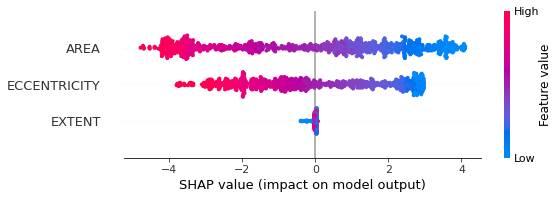

In [ ]:
import shap  # package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# summary plot
shap.summary_plot(shap_values, X_test)